# Using Machine Learning to Predict Future Diabetic Instances

> Diabetes is a chronic metabolic disorder characterized by the body's inability to regulate blood glucose levels due to insufficient insulin production or improper insulin utilization. Insulin, a hormone produced by the pancreas, is essential for enabling cells to absorb glucose, the body's primary energy source. When this process is disrupted, prolonged high blood glucose levels can lead to severe complications affecting multiple organ systems. Given the rising prevalence of diabetes worldwide, early detection and intervention are crucial. This capstone project aims to analyze a diabetes dataset and develop a machine learning model to predict potential future cases, thereby contributing to proactive disease management and improved patient outcomes.

### Possible Table of Contents Here

#### Libraries Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import sklearn

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Just for Visuals later on
import warnings
warnings.filterwarnings('ignore')
sns.color_palette(palette='crest')

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

### Features and Their Definitions 
    - Note: These are the shortened versions. For a full length description you can go **HERE**

In [3]:
feature_desc = pd.read_csv(r"C:\Users\Cady\Desktop\Capstone Project\feature_desc.csv", encoding='utf-8')
feature_desc

,Feature ID,Role,Description,Data Type
0,ID,ID,Patient ID,Int
1,diabetic,Target,0 = no diabetes 1 = prediabetes or diabetes,bool
2,highbp,Feature,0 = no high BP 1 = high BP,bool
3,highchol,Feature,0 = no high cholesterol 1 = high cholesterol,bool
4,cholcheck,Feature,0 = no cholesterol check in 5 years 1 = yes ch...,bool
5,bmi,Feature,Body Mass Index,Int
6,smoker,Feature,Have you smoked at least 100 cigarettes in you...,bool
7,stroke,Feature,(Ever told) you had a stroke. 0 = no 1 = yes,bool
8,heart_disease,Feature,coronary heart disease (CHD) or myocardial inf...,bool
9,phys_activity,Feature,physical activity in past 30 days - not includ...,bool


In [4]:
df = pd.read_csv(r'C:\Users\Cady\Desktop\Capstone Project\Original Data\diabetes_binary_health_indicators_BRFSS2015.csv')
df = df.astype(int)
df

,diabetic,highbp,highchol,cholcheck,bmi,smoker,stroke,heart_disease,phys_activity,fruits,...,health_coverage,no_doc_money,gen_health,ment_health,phys_health,diff_walk,sex,age,education,income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


### Data Cleaning

This data came pre-cleaned to make it easier to use. There are no null values and there are no missing/duplicated data.
> Credit and thanks go to Kaggle User Alex Teboul for cleaning the dataset so that others can use the data more easily.

In [5]:
# Double check there are no missing values
df.isna().sum()

diabetic           0
highbp             0
highchol           0
cholcheck          0
bmi                0
smoker             0
stroke             0
heart_disease      0
phys_activity      0
fruits             0
veggies            0
heavy_alch         0
health_coverage    0
no_doc_money       0
gen_health         0
ment_health        0
phys_health        0
diff_walk          0
sex                0
age                0
education          0
income             0
dtype: int64

## Exploring the Data

#### Of the Total Respondants, how many were officially diagnosed as Diabetic or Prediabetic?

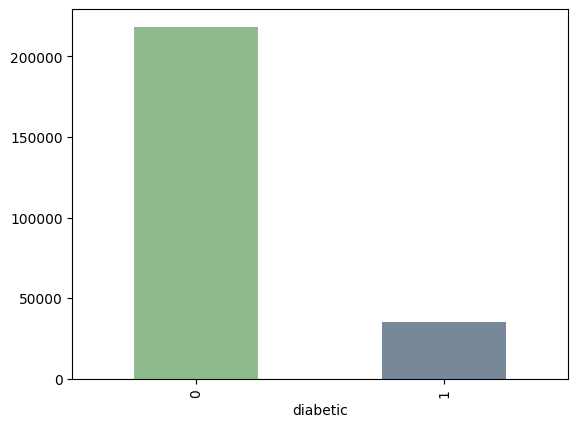

In [6]:
counts = df["diabetic"].value_counts()
counts.plot(kind="bar", color=["darkseagreen", "lightslategrey"])
plt.show()

### Diabetes based on Sex Assigned at Birth

In [7]:
df.sex.value_counts()

sex
0    141974
1    111706
Name: count, dtype: int64

In [8]:
pd.crosstab(df.diabetic, df.sex)

sex,0,1
diabetic,,
0,123563,94771
1,18411,16935


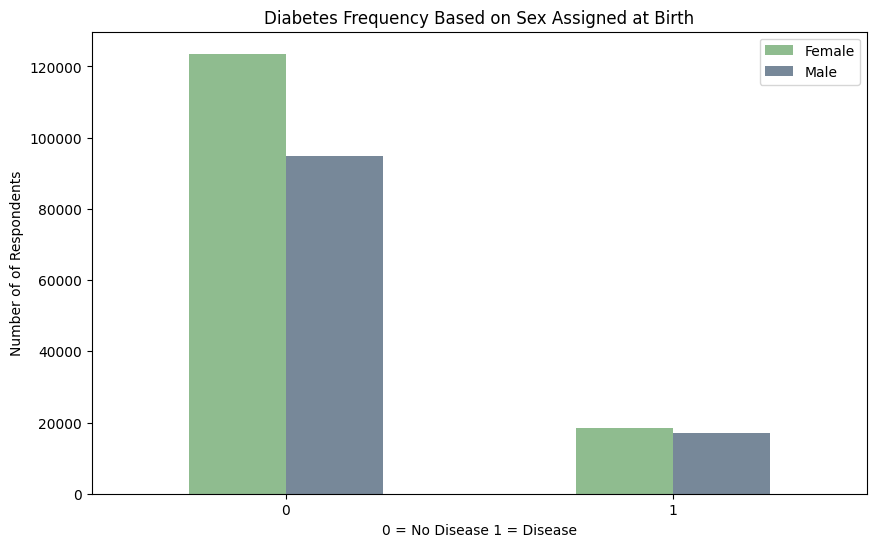

In [9]:
pd.crosstab(df.diabetic, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["darkseagreen", "lightslategrey"])

plt.title("Diabetes Frequency Based on Sex Assigned at Birth")
plt.xlabel("0 = No Disease 1 = Disease")
plt.ylabel("Number of of Respondents")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Diabetes and Age
> Ages have been set up in 13 buckets. Ages given were placed in buckets with 1 being 18-24, 2-12 being 5 year increments, and 13 being a respondent who was 80 years old or older.

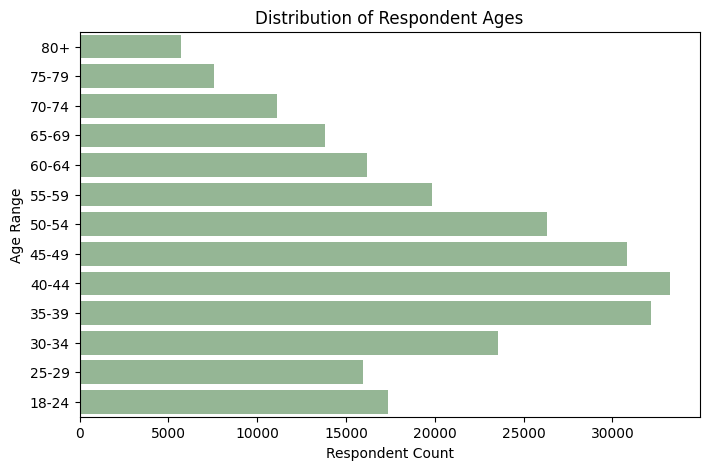

In [10]:
# create some categories for Age
AgeRange = ['80+', '75-79', '70-74', '65-69', '60-64','55-59','50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '18-24']
variable = pd.api.types.CategoricalDtype(ordered = True, categories = AgeRange)


plt.figure(figsize = [8, 5])
sns.countplot(data = df, y = 'age', color='darkseagreen')
plt.ylabel('Age Range')
plt.yticks(ticks=range(13), labels=AgeRange)
plt.xlabel('Respondent Count')
plt.title('Distribution of Respondent Ages');

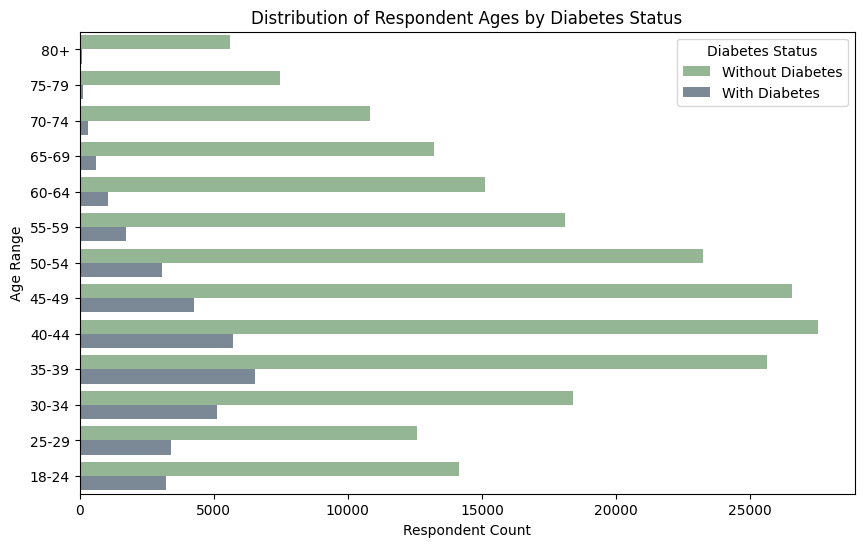

In [11]:
# Define your age range labels
AgeRange = ['80+', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '18-24']
custom_palette = ["darkseagreen", "lightslategrey"]
# Create the plot
plt.figure(figsize=[10, 6])
sns.countplot(data=df, y='age', hue='diabetic', palette=custom_palette)

# Set custom y-tick labels
plt.yticks(ticks=range(13), labels=AgeRange)

# Set axis labels and title
plt.ylabel('Age Range')
plt.xlabel('Respondent Count')
plt.title('Distribution of Respondent Ages by Diabetes Status')

# Show the plot
plt.legend(title='Diabetes Status', labels=['Without Diabetes', 'With Diabetes'])
plt.show()

As we can see, diabetes seems to trend roughly at the same rate no matter the age of the respondents.

## Corellation Of All Data Points

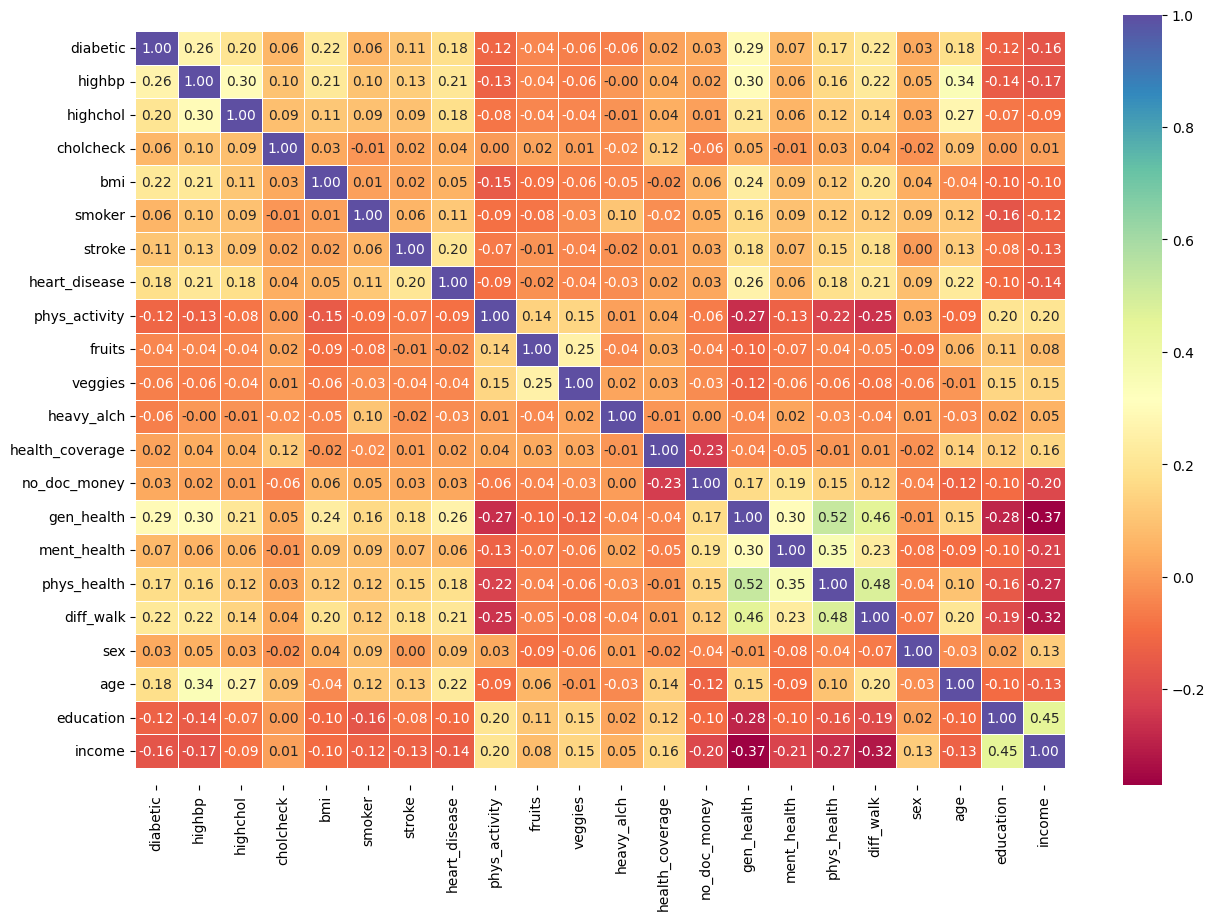

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="Spectral");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Self Reported Health idicators seem to all correlate as well as physical activity.

What is the relationship between physical activity levels and a positve diagnosis? Here, physical activity asks simply, "Have you been physically active in the last 30 days outside of work?"

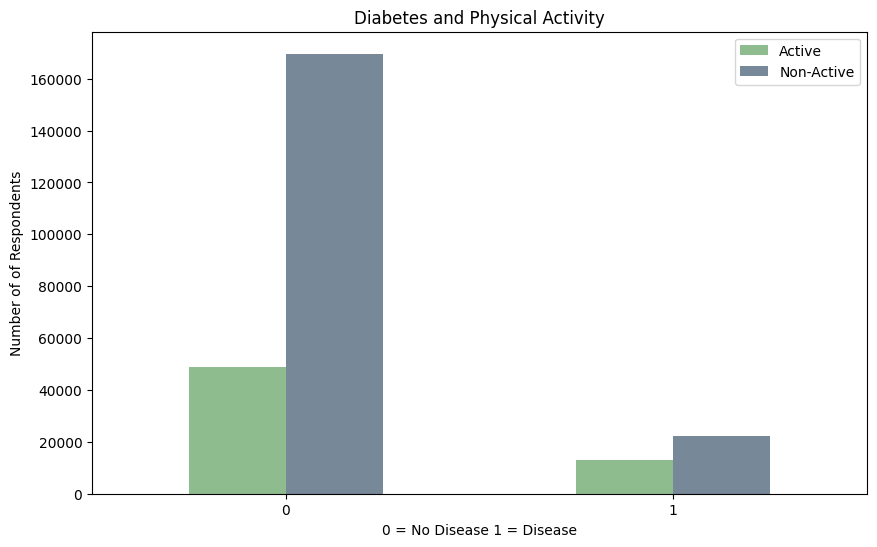

In [13]:
pd.crosstab(df.diabetic, df.phys_activity).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["darkseagreen", "lightslategrey"])

plt.title("Diabetes and Physical Activity")
plt.xlabel("0 = No Disease 1 = Disease")
plt.ylabel("Number of of Respondents")
plt.legend(["Active", "Non-Active"]);
plt.xticks(rotation=0);

### Is there a diet componant that might contribute to these findings? These are the respondents that stated they ate a fruit or a vegetable at least once per day.

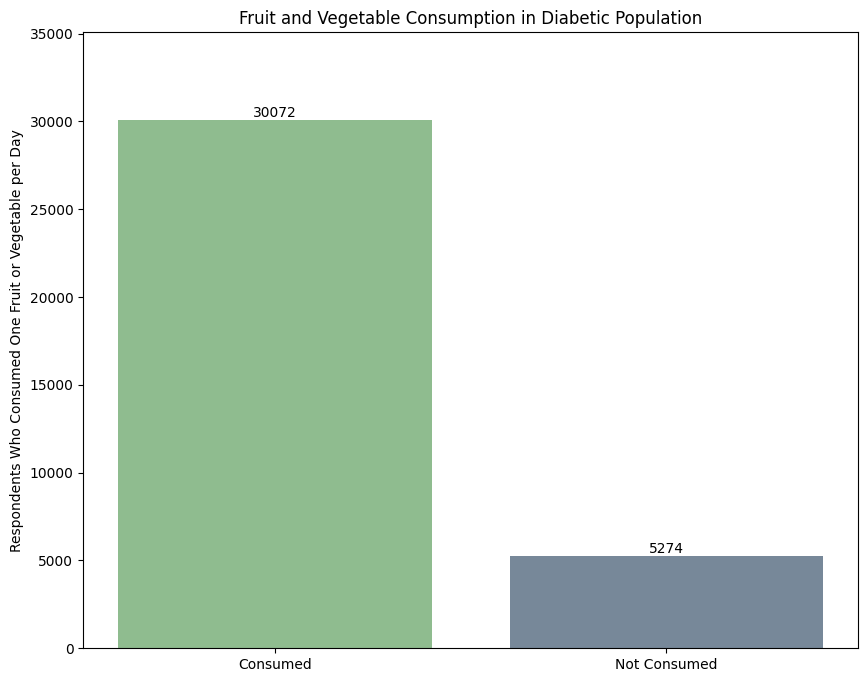

In [14]:
diabetic_df = df[df['diabetic'] == 1]

# Create a new column for combined consumption
diabetic_df.loc[:, 'consumption'] = diabetic_df['fruits'] + diabetic_df['veggies']

# Calculate consumption and non-consumption
consumption_count = (diabetic_df['consumption'] > 0).sum()  # Count of 1s (consumed)
non_consumption_count = len(diabetic_df) - consumption_count  # Total - consumed

# Create a bar plot
labels = ['Consumed', 'Not Consumed']
values = [consumption_count, non_consumption_count]

plt.figure(figsize=(10, 8))
bars = plt.bar(labels, values, color=["darkseagreen", "lightslategrey"])
plt.title('Fruit and Vegetable Consumption in Diabetic Population')
plt.ylabel('Respondents Who Consumed One Fruit or Vegetable per Day')
plt.ylim(0, max(values) + 5000)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()


## Lifestyle Factors

Money is often tied to being unable to treat illness. I wanted to compare those who didn't see a doctor in the last 12 months to the number who specifically stated they couldn't fo due to being unable to afford the doctor.

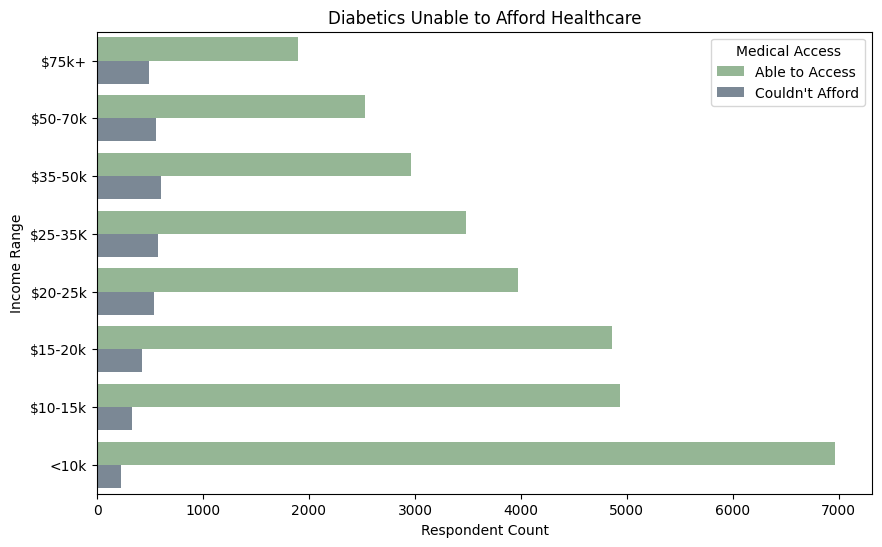

In [15]:
IncomeRange = ["$75k+", '$50-70k', '$35-50k', '$25-35K', '$20-25k', '$15-20k', '$10-15k', '<10k']
custom_palette = ["darkseagreen", "lightslategrey"]
# Create the plot
plt.figure(figsize=[10, 6])
sns.countplot(data=df[df['diabetic']==1], y='income', hue='no_doc_money', palette=custom_palette)

# Set custom y-tick labels
plt.yticks(ticks=range(8), labels=IncomeRange)

# Set axis labels and title
plt.ylabel('Income Range')
plt.xlabel('Respondent Count')
plt.title('Diabetics Unable to Afford Healthcare')

# Show the plot
plt.legend(title='Medical Access', labels=["Able to Access", "Couldn't Afford"])
plt.show()

> This graph suprised me the most. It seems that the people making the least amount of money were the most able to afford care. After some thinking and digging online I believe that it is most likely people who are on disability, where they are not allowed over a certain threshhold of money, to be able to access government funded healthcare. Less people make upwards of 75k a year, and since it is per household this could account for families living together. Government assistance often stops at the $15-20k per year threshold for households. (https://www.ssa.gov/disability/eligibility)

# Machine Learning Models
> Credit to Daniel Bourk for teaching the classes and tutorials that I am heavily leaning into for this section. While these are my own data and tests, most of my machine learning work is very similar to his thanks to his incredibly helpful tutorials and training videos.

### First, I'm going to split the data into training and testing data. 
> I will keep the traditional random seed of 42, because it is often choosen thanks to Douglas Adams' prolific works.

In [20]:
features = df.drop(["diabetic",], axis=1)

target = df["diabetic"]

In [17]:
features # This drops the target so we only train with this data, to see if we can acheive the target

,highbp,highchol,cholcheck,bmi,smoker,stroke,heart_disease,phys_activity,fruits,veggies,...,health_coverage,no_doc_money,gen_health,ment_health,phys_health,diff_walk,sex,age,education,income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [18]:
target # This just leaves the diabetic column, the target we are aiming for with our model. This will help us see how accurate our model is later.

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: diabetic, Length: 253680, dtype: int64

In [21]:
np.random.seed(42) #This is to make the model reproducable on other machines and with other sets of data. Thanks Douglas Adams.

features_train, features_test, target_train, target_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [22]:
features_train

,highbp,highchol,cholcheck,bmi,smoker,stroke,heart_disease,phys_activity,fruits,veggies,...,health_coverage,no_doc_money,gen_health,ment_health,phys_health,diff_walk,sex,age,education,income
31141,0,1,1,20,1,0,0,1,1,1,...,1,0,2,0,0,0,1,12,6,8
98230,0,0,1,34,0,0,0,1,0,1,...,1,0,3,0,0,0,1,8,5,8
89662,1,1,1,24,0,0,0,1,1,1,...,1,0,2,0,5,0,1,12,5,6
208255,0,1,1,27,0,0,0,1,1,1,...,1,0,1,0,0,0,1,5,6,7
233415,0,1,1,24,0,0,0,1,1,1,...,1,0,3,0,0,1,0,12,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0,1,45,1,0,0,1,1,0,...,1,1,1,15,0,0,0,5,4,1
103694,1,1,1,29,1,0,0,1,0,1,...,1,0,3,0,0,0,1,11,6,7
131932,0,1,1,25,0,0,0,1,1,1,...,1,0,2,0,3,0,0,9,6,8
146867,0,0,0,23,0,0,0,0,1,1,...,1,1,2,0,0,0,0,5,6,6


In [23]:
target_train, len(target_train)

(31141     0
 98230     0
 89662     1
 208255    0
 233415    0
          ..
 119879    0
 103694    0
 131932    0
 146867    0
 121958    1
 Name: diabetic, Length: 202944, dtype: int64,
 202944)

### We are creating a function that fits our models and scores them based on accuracy. 
>  This function was created by Daniel Bourke. I learned it when I took a course of his 2 years ago.

In [24]:
models = {"Logistic Regression": LogisticRegression(max_iter=200),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, features_train, features_test, target_train, target_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of various Scikit-Learn machine learning models
    features_train : training data (no labels)
    features_test : testing data (no labels)
    target_train : training labels
    target_test : test labels
    """
    # Set random seed (again, for reproducible results)
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(features_train, target_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(features_test, target_test)
    return model_scores

**Note** This model has to be run on a smaller number of iterations, as my computer is currently unable to handle these processes and the background programs required for a presentation simultaneously. The model will be fit with more interations when run in production. The error box below is not indicative of faulty code, but rather an ill equipped processor. It will still run, it will just take longer.

In [25]:
model_scores = fit_and_score(models=models,
                             features_train=features_train,
                             features_test=features_test,
                             target_train=target_train,
                             target_test=target_test)

model_scores

{'Logistic Regression': 0.8653618732261117,
 'KNN': 0.8489435509303059,
 'Random Forest': 0.8598628192999054}

> The above nummbers are the current accuracy of the three models used. To make it easier, the below visual shows the same data in a more easily read format.

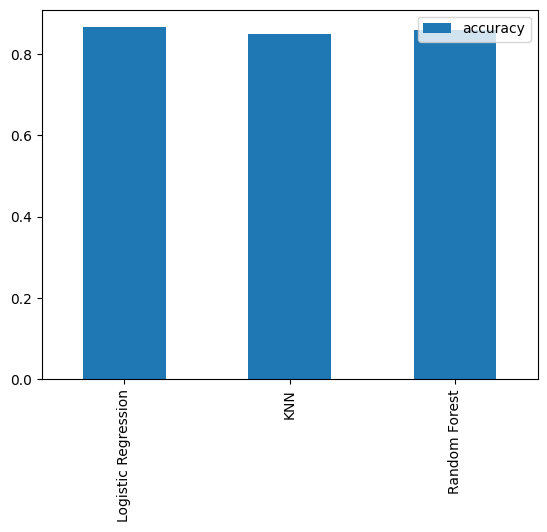

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

> As we can see, the models are currently only slightly over 80-85% accurate. In order to use any of them in a meaningful way, it would be much better if they ran at a 95% threshold or higher.

### Fine Tuning the models to see if the reccommended 80% threshhold could be met.

To do so we will use these parameters:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

#### First, We will tune the Logistic Regression and the Random Forest models, both using hyperparametesr and RandomizedSearchCV

In [19]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### First, the Logic Regression

In [20]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(features_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(features_test, target_test)

The score change was statistically insignificant. I will probably try GridSearch as well to see if it can further improve the scores.

### The Random Forrest Classifier Model
> **Note** For the purposes of this presentation the model has been set to lower standards, during production it can be run on a higher processor with higher n_estimators and iterations. 

In [21]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=3,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(features_train, target_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [22]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(17),
 'max_depth': None}

In [23]:
# Check to see if this improved the models at all.
rs_rf.score(features_test, target_test)

0.8677861873226111

Becuase the model is tested randomly, we will not get the exact same results every time we run the model.

### Finally, I'm going to try and improve the K-Nearest Neighbors model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Sample a smaller portion of your data
features_train_sample, _, target_train_sample, _ = train_test_split(features_train, target_train, test_size=0.8, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
features_train_pca = pca.fit_transform(features_train_sample)
features_test_pca = pca.transform(features_test)

train_scores = []
test_scores = []

# Setup KNN instance with parallel processing
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)

# Loop through different n_neighbors with reduced range
for i in range(1, 11):
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm on the reduced training set
    knn.fit(features_train_pca, target_train_sample)
    
    # Update the training scores list
    train_scores.append(knn.score(features_train_pca, target_train_sample))
    
    # Update the test scores list
    test_scores.append(knn.score(features_test_pca, target_test))

# Output the scores
print("Train Scores:", train_scores)
print("Test Scores:", test_scores)

Train Scores: [0.998275352320883, 0.9006110180348872, 0.9017443579383069, 0.8851877402187839, 0.8857297723465064, 0.8776978417266187, 0.8789543707499754, 0.8742239085443974, 0.8748152163200946, 0.8717847639696462]
Test Scores: [0.8070797855566068, 0.8539892778303374, 0.8378271838536739, 0.8557237464522233, 0.8474258908861558, 0.8574187953327026, 0.8528263954588458, 0.8580298013245033, 0.8545805739514348, 0.8586605171870072]


In [25]:
train_scores

[0.998275352320883,
 0.9006110180348872,
 0.9017443579383069,
 0.8851877402187839,
 0.8857297723465064,
 0.8776978417266187,
 0.8789543707499754,
 0.8742239085443974,
 0.8748152163200946,
 0.8717847639696462]

In [26]:
test_scores

[0.8070797855566068,
 0.8539892778303374,
 0.8378271838536739,
 0.8557237464522233,
 0.8474258908861558,
 0.8574187953327026,
 0.8528263954588458,
 0.8580298013245033,
 0.8545805739514348,
 0.8586605171870072]

### The results of K-Nearest Neighbors Training vs Testing

Maximum KNN score on the test data: 85.87%


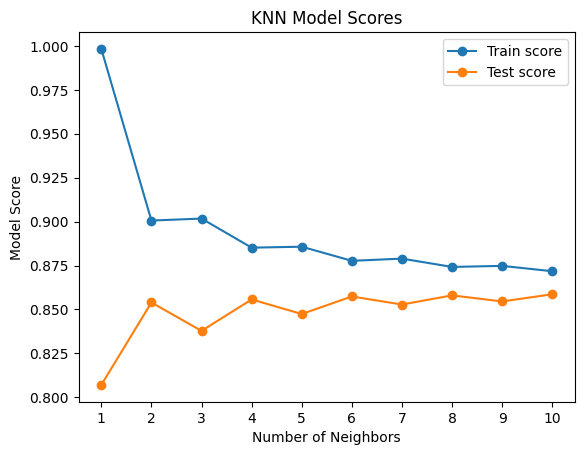

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of neighbors
neighbors = range(1, 11)

# Plot train and test scores against the number of neighbors
plt.plot(neighbors, train_scores, label="Train score", marker='o')
plt.plot(neighbors, test_scores, label="Test score", marker='o')
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.title("KNN Model Scores")
plt.legend()

# Print the maximum test score
print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

plt.show()

## Hypertuning with GridSearchCV

### First, Logitiscal Regression

In [28]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=3,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(features_train, target_train);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [29]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': np.float64(0.03039195382313198), 'solver': 'liblinear'}

In [30]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(features_test, target_test)

0.8656969410280668

In [31]:
from sklearn.model_selection import GridSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=3,
                     verbose=True,
                     n_jobs=-1)

# Fit grid hyperparameter search model
gs_rf.fit(features_train, target_train)

# Print best parameters and score
print("Best Parameters:", gs_rf.best_params_)
print("Best Score:", gs_rf.best_score_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


C:\Users\Cady\miniforge3\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_leaf': np.int64(5), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(60)}
Best Score: 0.8654752049826554


In [32]:
# Check the best hyperparmaters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': np.int64(5),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(60)}

In [34]:
# Evaluate the grid search LogisticRegression model
gs_rf.score(features_test, target_test)

0.8669583727530747

## While not a threshold we currently want to achieve, The Random Forrest Classifier tuned with GridSearchCV has given us the best scores so far. 

> **Note:** The current models have been tested using a subset of hyperparameters due to computational constraints. As a result, they serve as a proof of concept rather than fully optimized solutions. Future iterations on more powerful hardware could yield improved performance through more comprehensive hyperparameter tuning.

### Further Methods to Score the Selected Model.

#### AUROC Curve

In [62]:
target_pred = gs_rf.predict_proba(features_test)[:, 1]

In [63]:
target_pred

array([0.0559422 , 0.24792062, 0.00909245, ..., 0.10000955, 0.13750002,
       0.01045248])

In [45]:
target_test

219620    0
132821    0
151862    0
139717    0
239235    0
         ..
169513    1
182415    0
109739    0
181671    0
202118    0
Name: diabetic, Length: 50736, dtype: int64

In [52]:
from sklearn.metrics import RocCurveDisplay

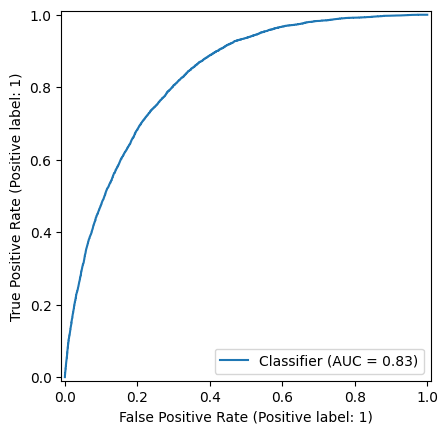

In [64]:
sklearn.metrics.RocCurveDisplay.from_predictions(target_test, target_pred)

#### A Confusion Matrix

In [68]:
# Convert probabilities to binary predictions using a threshold of 0.5
target_pred = (target_pred >= 0.5).astype(int)  

print(confusion_matrix(target_test, target_pred))

[[43347   392]
 [ 6358   639]]


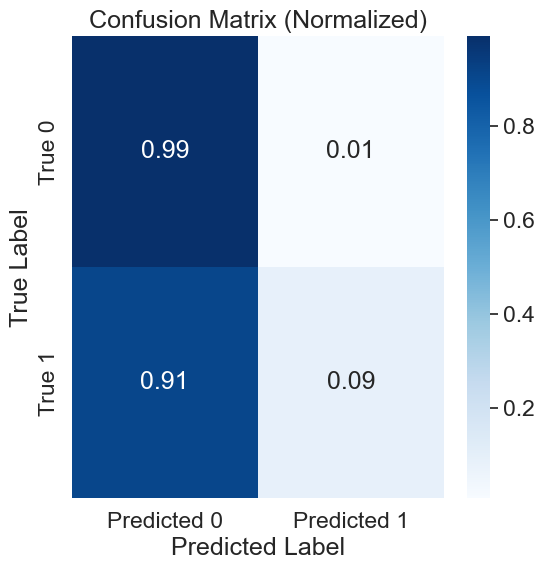

In [71]:
sns.set(font_scale=1.5)

def plot_conf_mat(target_test, target_pred):
    cm = confusion_matrix(target_test, target_pred)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Set up the plot
    plt.figure(figsize=(6, 6))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(cm_normalized, annot=True, fmt=".2f", cbar=True,
                     cmap='Blues', 
                     xticklabels=['Predicted 0', 'Predicted 1'],
                     yticklabels=['True 0', 'True 1'])

    # Set plot labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Normalized)')

    plt.show()

# Call the function with your test data and predictions
plot_conf_mat(target_test, target_pred)

### Cross-Validation

In [72]:
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43739
           1       0.62      0.09      0.16      6997

    accuracy                           0.87     50736
   macro avg       0.75      0.54      0.54     50736
weighted avg       0.84      0.87      0.82     50736



In [80]:
rf_model = gs_rf.best_estimator_

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define your scoring metrics as before
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Store results in a dictionary
cv_results = {}
for metric in scoring.keys():
    cv_results[metric] = cross_val_score(rf_model, features, target, cv=skf, scoring=scoring[metric])


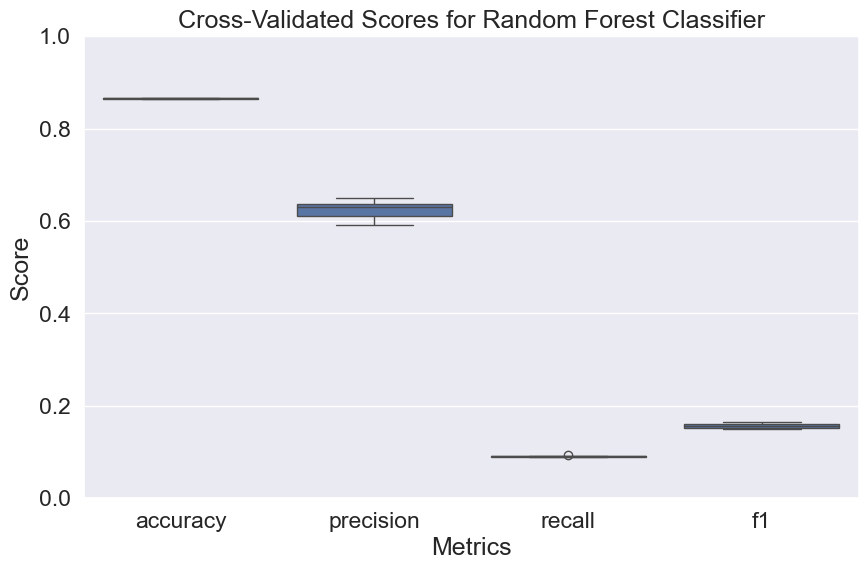

In [82]:
results_df = pd.DataFrame(cv_results)
results_df = results_df.melt(var_name='Metric', value_name='Score')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', data=results_df)
plt.title('Cross-Validated Scores for Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set limits for better visualization
plt.show()

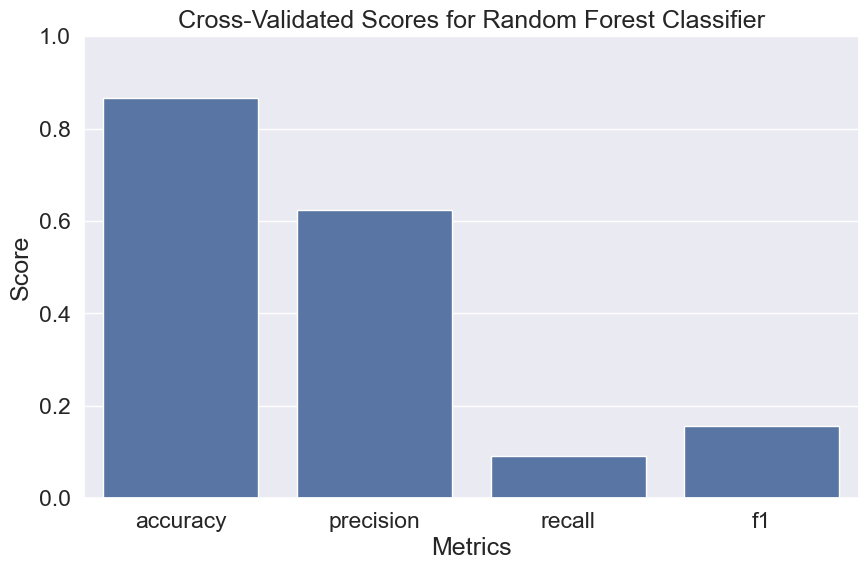

In [86]:
results_df = pd.DataFrame(cv_results).mean(axis=0).reset_index()
results_df.columns = ['Metric', 'Score']

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=results_df)
plt.title('Cross-Validated Scores for Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.show()

### Feature Importance

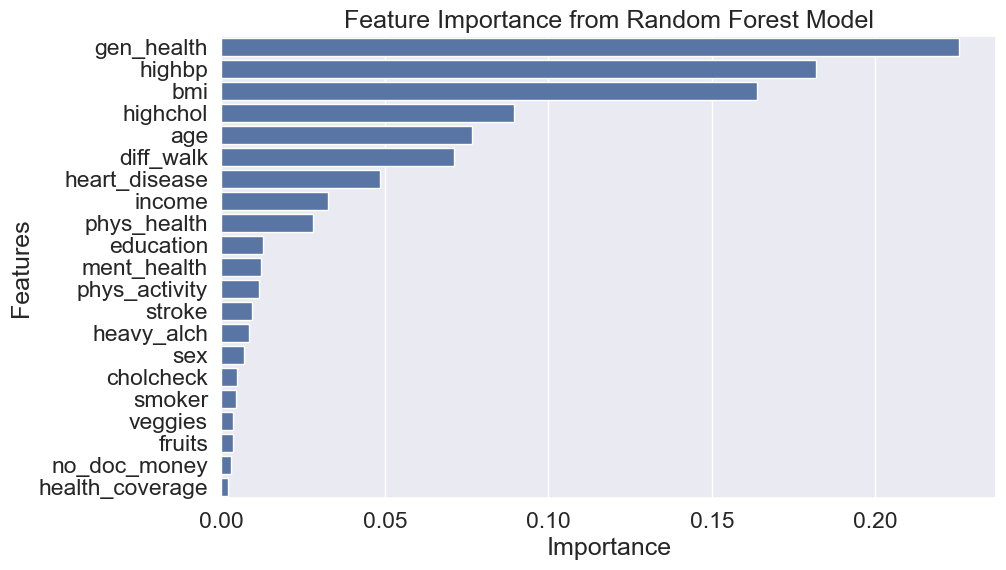

In [88]:
feature_importances = rf_model.feature_importances_

feature_names = features.columns 
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
#plt.xlim(0, 1)
plt.show()

## Conclusion: As anticipated, health-related factors emerge as the most significant predictors of diabetes cases. It is evident that by concentrating solely on health metrics, we could enhance the model's accuracy considerably. However, this dataset was selected to investigate the potential impact of lifestyle factors on patients' health outcomes, and the findings confirm that these factors do indeed play a role.